<a href="https://colab.research.google.com/github/Mahnytskyy/MN-4-8-Ivan-Mahnytskyy/blob/main/%D0%9B%D0%B0%D0%B15_2_%D0%9C%D0%B0%D0%B3%D0%BD%D0%B8%D1%86%D1%8C%D0%BA%D0%B8%D0%B9_%D0%86%D0%B2%D0%B0%D0%BD_%D0%A4%D0%86%D0%A24_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Імпорт необхідних бібліотек
import pandas as pd
import numpy as np

# Завантаження файлу з Google Drive або локального сховища
from google.colab import files
uploaded = files.upload()

# Читання CSV файлу
data = pd.read_csv(next(iter(uploaded)))



Saving Student_data.csv to Student_data (2).csv


In [4]:
# 1. Вивести перші 5 рядків
print("Перші 5 рядків датасету:")
print(data.head())

Перші 5 рядків датасету:
   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering       GPA  GradeClass  
0             0  2.929196        

In [5]:
# 2. Вивести розмір датасету
print("\nРозмір датасету:")
print(data.shape)



Розмір датасету:
(2392, 15)


In [6]:
# 3. Вивести типи даних
print("\nТипи даних у кожному стовпці:")
print(data.dtypes)



Типи даних у кожному стовпці:
StudentID              int64
Age                    int64
Gender                 int64
Ethnicity              int64
ParentalEducation      int64
StudyTimeWeekly      float64
Absences               int64
Tutoring               int64
ParentalSupport        int64
Extracurricular        int64
Sports                 int64
Music                  int64
Volunteering           int64
GPA                  float64
GradeClass           float64
dtype: object


In [7]:
# 4. Перевірка на пропущені значення
print("\nКількість пропущених значень у кожному стовпці:")
print(data.isnull().sum())

# Замінити пропущені значення на середнє по стовпцю (якщо такі є)
data.fillna(data.mean(), inplace=True)
print("\nПропущені значення були замінені на середні")


Кількість пропущених значень у кожному стовпці:
StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

Пропущені значення були замінені на середні


In [8]:
# 5. Перевірити на дублікати
duplicates = data.duplicated().sum()
print(f"\nКількість дублікатів: {duplicates}")

# Якщо є дублікати, видалити їх
if duplicates > 0:
    data = data.drop_duplicates()
    print("\nДублікати були видалені.")


Кількість дублікатів: 0


In [9]:
# 6. Вивести описову статистику
print("\nОписова статистика:")
print(data.describe())


Описова статистика:
         StudentID          Age       Gender    Ethnicity  ParentalEducation  \
count  2392.000000  2392.000000  2392.000000  2392.000000        2392.000000   
mean   2196.500000    16.468645     0.510870     0.877508           1.746237   
std     690.655244     1.123798     0.499986     1.028476           1.000411   
min    1001.000000    15.000000     0.000000     0.000000           0.000000   
25%    1598.750000    15.000000     0.000000     0.000000           1.000000   
50%    2196.500000    16.000000     1.000000     0.000000           2.000000   
75%    2794.250000    17.000000     1.000000     2.000000           2.000000   
max    3392.000000    18.000000     1.000000     3.000000           4.000000   

       StudyTimeWeekly     Absences     Tutoring  ParentalSupport  \
count      2392.000000  2392.000000  2392.000000      2392.000000   
mean          9.771992    14.541388     0.301421         2.122074   
std           5.652774     8.467417     0.458971   

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Завантаження даних
data = pd.read_csv('Student_data.csv')

# 1. Підготовка даних
X = data.drop('GradeClass', axis=1)  # Ознаки
y = data['GradeClass']               # Цільова змінна

# Стандартизація даних
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Розбиваємо на тренувальні та тестові набори
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)



In [11]:
# 2. Моделі класифікації

# Логістична регресія
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("Логістична регресія:")
print(f"Точність: {accuracy_score(y_test, y_pred_log_reg)}")
print(classification_report(y_test, y_pred_log_reg))

Логістична регресія:
Точність: 0.7270194986072424
              precision    recall  f1-score   support

         0.0       0.29      0.12      0.17        33
         1.0       0.40      0.36      0.38        80
         2.0       0.55      0.64      0.59       121
         3.0       0.67      0.50      0.58       127
         4.0       0.88      0.97      0.93       357

    accuracy                           0.73       718
   macro avg       0.56      0.52      0.53       718
weighted avg       0.71      0.73      0.71       718



In [12]:
# Дерево рішень
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("\nДерево рішень:")
print(f"Точність: {accuracy_score(y_test, y_pred_dt)}")
print(classification_report(y_test, y_pred_dt))


Дерево рішень:
Точність: 0.9317548746518106
              precision    recall  f1-score   support

         0.0       0.76      0.67      0.71        33
         1.0       0.82      0.91      0.86        80
         2.0       0.92      0.92      0.92       121
         3.0       0.94      0.91      0.92       127
         4.0       0.98      0.97      0.97       357

    accuracy                           0.93       718
   macro avg       0.88      0.88      0.88       718
weighted avg       0.93      0.93      0.93       718



In [13]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("\nRandom Forest:")
print(f"Точність: {accuracy_score(y_test, y_pred_rf)}")
print(classification_report(y_test, y_pred_rf))


Random Forest:
Точність: 0.9192200557103064
              precision    recall  f1-score   support

         0.0       1.00      0.48      0.65        33
         1.0       0.83      0.90      0.86        80
         2.0       0.92      0.89      0.91       121
         3.0       0.88      0.91      0.89       127
         4.0       0.95      0.98      0.96       357

    accuracy                           0.92       718
   macro avg       0.92      0.83      0.86       718
weighted avg       0.92      0.92      0.92       718



In [14]:
# Підбір параметрів для Random Forest за допомогою GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, n_jobs=-1)
grid_rf.fit(X_train, y_train)

print("\nНайкращі параметри для Random Forest:")
print(grid_rf.best_params_)


Найкращі параметри для Random Forest:
{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


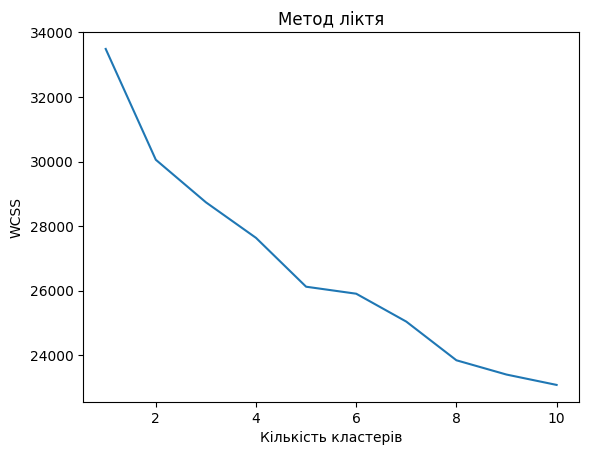

In [15]:
# 3. Метод ліктя для кластеризації

# Кластеризація методом KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Метод ліктя
plt.plot(range(1, 11), wcss)
plt.title('Метод ліктя')
plt.xlabel('Кількість кластерів')
plt.ylabel('WCSS')
plt.show()

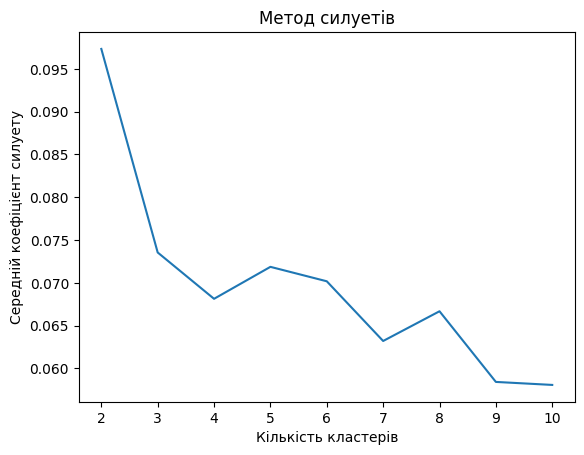

In [16]:
# 4. Метод силуетів для визначення оптимальної кількості кластерів
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

plt.plot(range(2, 11), silhouette_scores)
plt.title('Метод силуетів')
plt.xlabel('Кількість кластерів')
plt.ylabel('Середній коефіцієнт силуету')
plt.show()

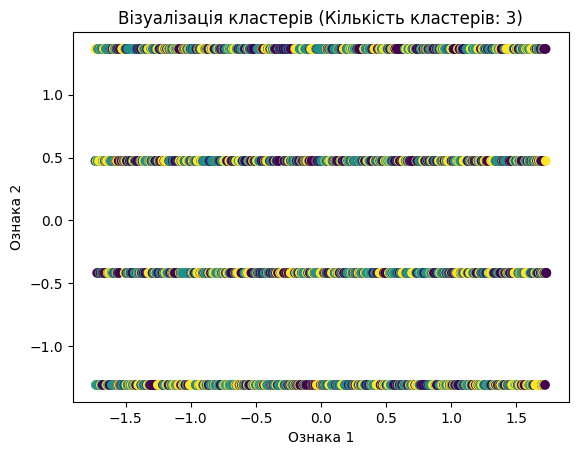

In [17]:
# Візуалізація кластерів (припустимо, що 3 кластери оптимальні)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Візуалізація перших двох ознак та кластерів
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, cmap='viridis')
plt.title(f'Візуалізація кластерів (Кількість кластерів: {optimal_clusters})')
plt.xlabel('Ознака 1')
plt.ylabel('Ознака 2')
plt.show()